<a href="https://colab.research.google.com/github/shahd1995913/OCR-for-Chemistry/blob/main/Final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

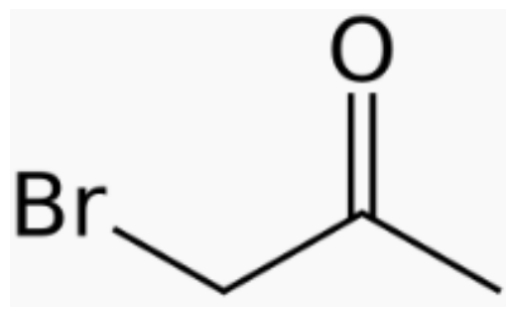

In [7]:

import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('/content/test_images/new.png')

# Resize the image to the desired size
resized_image = cv2.resize(image, (500, 300))

# Plot the image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: turn off the axis labels
plt.show()


In [14]:
from PIL import Image
import os

def convert_to_white_background(input_folder, output_folder, target_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all the files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Open the image
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)

            # Resize the image to the target size
            resized_img = img.resize(target_size)

            # Create a new image with white background
            new_img = Image.new("RGB", target_size, "white")
            new_img.paste(resized_img, mask=resized_img.split()[3])  # Preserve transparency if present

            # Save the image with white background to the output folder
            output_path = os.path.join(output_folder, filename)
            new_img.save(output_path)

            print(f"Converted image: {output_path}")

# Specify the input and output folders
input_folder = "/content/test_images"
output_folder = "/content/new test_images"

# Specify the target size for the images
target_size = (500, 300)  # Width: 500, Height: 300

# Call the function to convert the images to have a white background and resize them
convert_to_white_background(input_folder, output_folder, target_size)

Converted image: /content/new test_images/new.png


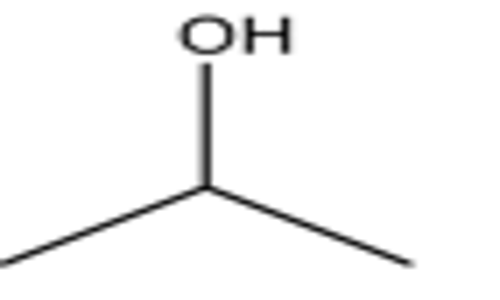

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/new input_Data/class 1.png')
object_to_replace = cv2.imread('/content/new Label Data/product.png')

# Resize the template to match the dimensions of the image
resized_object = cv2.resize(object_to_detect, (image.shape[1], image.shape[0]))

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(resized_object, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Resize the replacement object to match the dimensions of the region to be replaced
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized

# Display the modified image
cv2_imshow(image)


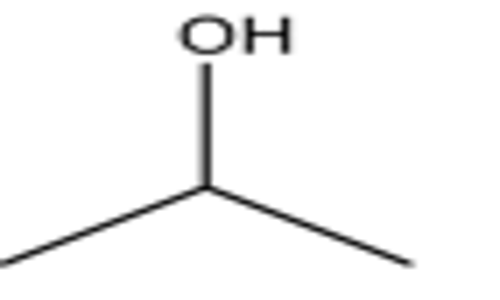

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/new input_Data/class 1.png')
object_to_replace = cv2.imread('/content/new Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + object_to_detect.shape[1], top_left[1] + object_to_detect.shape[0])

# Resize the replacement object to match the dimensions of the region to be replaced
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized

# Display the modified image
cv2_imshow(image)


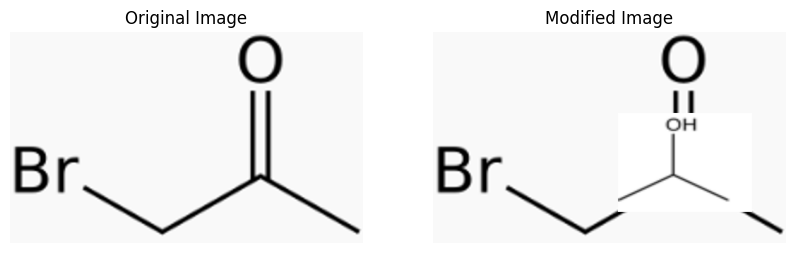

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Resize the replacement object to match the region dimensions
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image_copy = image.copy()
image_copy[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified Image')
axes[1].axis('off')

plt.show()


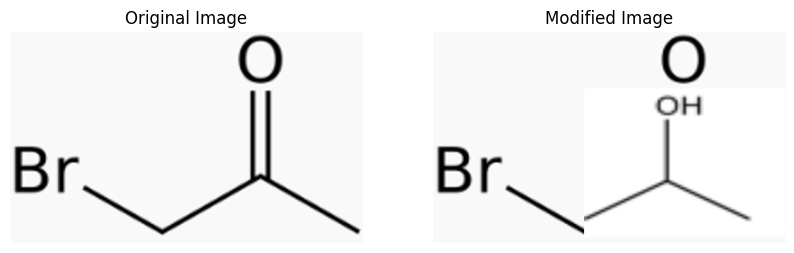

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Expand the region to be replaced
expansion_factor = 1.5  # Adjust this value to control the expansion size
expanded_top_left = (int(top_left[0] - (bottom_right[0] - top_left[0]) * (expansion_factor - 1) / 2),
                     int(top_left[1] - (bottom_right[1] - top_left[1]) * (expansion_factor - 1) / 2))
expanded_bottom_right = (int(bottom_right[0] + (bottom_right[0] - top_left[0]) * (expansion_factor - 1) / 2),
                         int(bottom_right[1] + (bottom_right[1] - top_left[1]) * (expansion_factor - 1) / 2))

# Resize the replacement object to match the expanded region dimensions
object_to_replace_resized = cv2.resize(object_to_replace, (expanded_bottom_right[0] - expanded_top_left[0], expanded_bottom_right[1] - expanded_top_left[1]))

# Replace the expanded region with the resized replacement object
image_copy = image.copy()
image_copy[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = object_to_replace_resized

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
axes[1].set_title('Modified Image')
axes[1].axis('off')

plt.show()


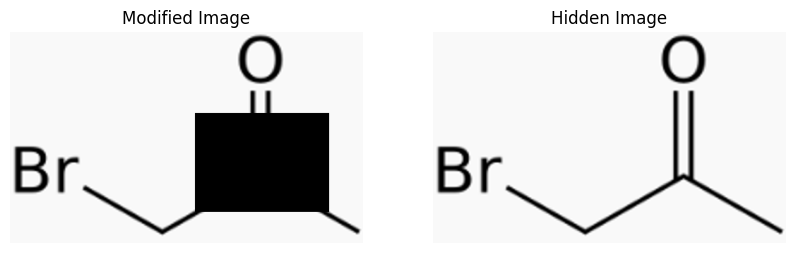

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Resize the replacement object to match the region dimensions
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image_copy = image.copy()
image_copy[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized

# Hide the object_to_detect region in the image_copy
image_copy[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = [0, 0, 0]  # Set to black color

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
axes[0].set_title('Modified Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Hidden Image')
axes[1].axis('off')

plt.show()


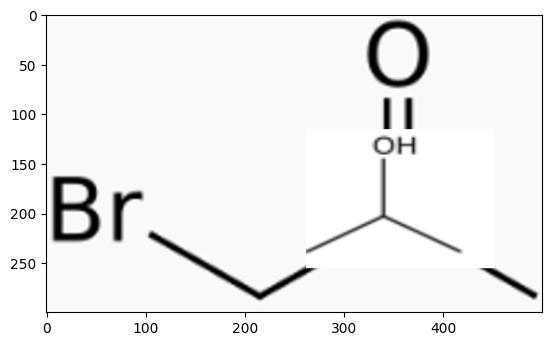

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Resize the replacement object to match the region dimensions
object_to_replace_resized = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object
image_copy = image.copy()
image_copy[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = [1, 1, 1]

# Hide the detected object in the image_copy
image_copy[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = object_to_replace_resized # Set to black color

# Plot the modified image
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()


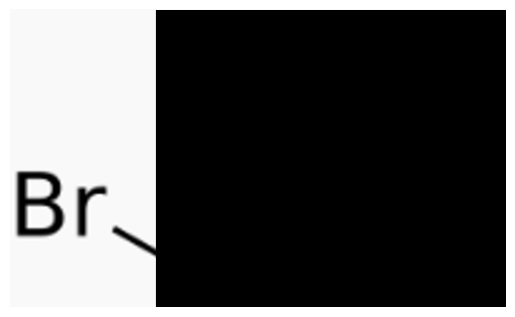

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Calculate the expanded region
expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
expanded_bottom_right = (min(image.shape[1], bottom_right[0] + expand_factor), min(image.shape[0], bottom_right[1] + expand_factor))

# Create a mask with black color in the expanded region
mask = np.ones_like(image) * 255  # Start with a white mask
mask[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = 0  # Set the region to black

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, mask)

# Plot the masked image
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


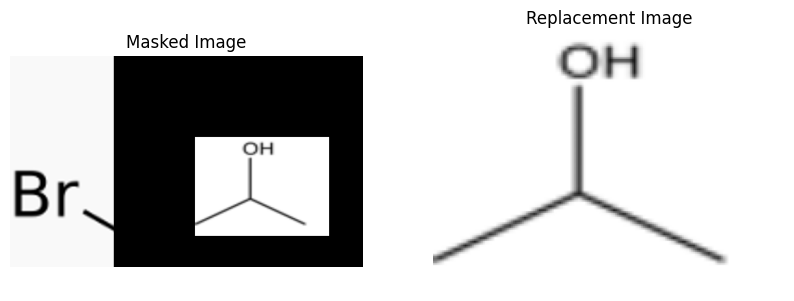

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/new test_images/new.png')

# Define the object to detect and its replacement
object_to_detect = cv2.imread('/content/input_Data/class 1.png')
object_to_replace = cv2.imread('/content/Label Data/product.png')

# Convert the images to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_object = cv2.cvtColor(object_to_detect, cv2.COLOR_BGR2GRAY)

# Perform object detection
result = cv2.matchTemplate(gray_image, gray_object, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + gray_object.shape[1], top_left[1] + gray_object.shape[0])

# Define the expansion factor
expand_factor = 115  # Adjust this value as desired

# Calculate the expanded region
expanded_top_left = (max(0, top_left[0] - expand_factor), max(0, top_left[1] - expand_factor))
expanded_bottom_right = (min(image.shape[1], bottom_right[0] + expand_factor), min(image.shape[0], bottom_right[1] + expand_factor))

# Create a mask with white color in the expanded region
mask = np.ones_like(image) * 255  # Start with a white mask
mask[expanded_top_left[1]:expanded_bottom_right[1], expanded_top_left[0]:expanded_bottom_right[0]] = 0  # Set the region to black

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, mask)

# Resize the replacement object to match the region dimensions
resized_object_to_replace = cv2.resize(object_to_replace, (bottom_right[0] - top_left[0], bottom_right[1] - top_left[1]))

# Replace the detected object with the resized replacement object in the masked image
masked_image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = resized_object_to_replace

# Plot the masked image and the replacement image
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Masked Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(resized_object_to_replace, cv2.COLOR_BGR2RGB))
axes[1].set_title('Replacement Image')
axes[1].axis('off')

plt.show()


# AI part
## The Classifiction part

In [62]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Set the path to your dataset folder
data_dir = '/content/new input_Data'

# Set the input image size
image_size = (224, 224)

# Set the number of classes
num_classes = 4

# Load and preprocess the images
images = []
labels = []


import os

image_files = os.listdir(data_dir)
image_files.sort()  # Sort the files in alphabetical order if needed

for i, file_name in enumerate(image_files):
    image_path = os.path.join(data_dir, file_name)

    if os.path.isfile(image_path):
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        images.append(image_array)
        labels.append(i)  # Assuming the labels are 0-based indices
    else:
        print(f"File not found: {image_path}")

# Convert the images and labels to NumPy arrays
images = tf.stack(images)
labels = tf.keras.utils.to_categorical(labels, num_classes)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(images, labels, epochs=20)

# Save the trained model
model.save('trained_model.h5')



Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 11.2322 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 1s 555ms/step - loss: 908.2576 - accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 1s 535ms/step - loss: 434.4709 - accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 1s 534ms/step - loss: 99.3647 - accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 1s 540ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 527ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 513ms/step - loss: 9.3379e-06 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 532ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 1s 521ms/step - loss: 3.0516e-05 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 515ms/step - loss: 0.0000e+00 - accur

# Test New Image based on Model  provide accurcy nad make the replacment aslo with product image

1/1 [==============================] - 0s 59ms/step
Predicted Class: 3
Probability: 1.0


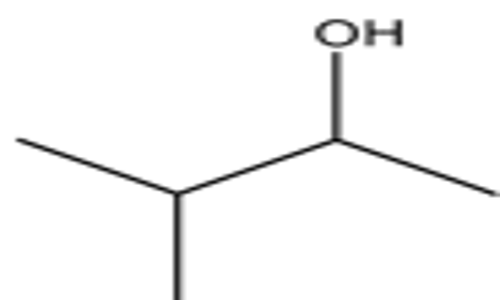

In [77]:

import os
from PIL import Image

test_image_path = '/content/new input_Data/class 3.png'  # Replace with the path to your test image
test_image = load_img(test_image_path, target_size=image_size)
test_image_array = img_to_array(test_image)
test_image_array = tf.expand_dims(test_image_array, axis=0)  # Add an extra dimension for batch size
predictions = model.predict(test_image_array)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
class_probability = predictions[0][predicted_class]

print(f"Predicted Class: {predicted_class+1}")
print(f"Probability: {class_probability}")

predicted_class = predicted_class+1
# Assuming the predicted class is stored in the variable 'predicted_class'

# Set the path to the folder containing the image files
folder_path = '/content/new Label Data'

# Find the image file corresponding to the predicted class
image_file_name = f"p{predicted_class}.png"
image_path = os.path.join(folder_path, image_file_name)

# Check if the image file exists
if os.path.exists(image_path):
    image = Image.open(image_path)
    image.show()
else:
    print(f"Image file {image_file_name} not found.")


1/1 [==============================] - 0s 60ms/step
Predicted Class: 3
Probability: 1.0


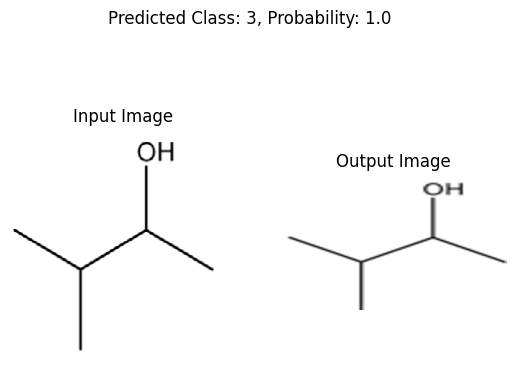

In [78]:
import os
import matplotlib.pyplot as plt
from PIL import Image

test_image_path = '/content/new input_Data/class 3.png'  # Replace with the path to your test image
test_image = load_img(test_image_path, target_size=image_size)
test_image_array = img_to_array(test_image)
test_image_array = tf.expand_dims(test_image_array, axis=0)  # Add an extra dimension for batch size
predictions = model.predict(test_image_array)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
class_probability = predictions[0][predicted_class]

print(f"Predicted Class: {predicted_class+1}")
print(f"Probability: {class_probability}")

predicted_class = predicted_class+1
# Assuming the predicted class is stored in the variable 'predicted_class'

# Set the path to the folder containing the image files
folder_path = '/content/new Label Data'

# Find the image file corresponding to the predicted class
image_file_name = f"p{predicted_class}.png"
image_path = os.path.join(folder_path, image_file_name)

# Check if the image file exists
if os.path.exists(image_path):
    image = Image.open(image_path)

    # Plot input image
    plt.subplot(1, 2, 1)
    plt.imshow(test_image)
    plt.title('Input Image')
    plt.axis('off')

    # Plot output image
    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title('Output Image')
    plt.axis('off')

    # Plot accuracy
    plt.suptitle(f"Predicted Class: {predicted_class}, Probability: {class_probability}")

    # Show the plot
    plt.show()
else:
    print(f"Image file {image_file_name} not found.")

1/1 [==============================] - 0s 59ms/step
Predicted Class: 3
Probability: 1.0


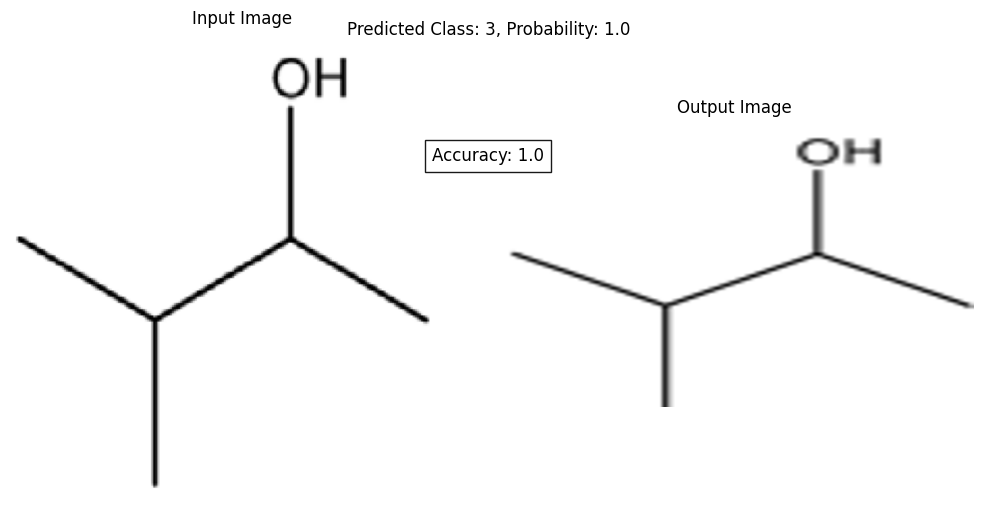

In [82]:
import os
import matplotlib.pyplot as plt
from PIL import Image

test_image_path = '/content/new input_Data/class 3.png'  # Replace with the path to your test image
test_image = load_img(test_image_path, target_size=image_size)
test_image_array = img_to_array(test_image)
test_image_array = tf.expand_dims(test_image_array, axis=0)  # Add an extra dimension for batch size
predictions = model.predict(test_image_array)
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
class_probability = predictions[0][predicted_class]

print(f"Predicted Class: {predicted_class+1}")
print(f"Probability: {class_probability}")

predicted_class = predicted_class+1
# Assuming the predicted class is stored in the variable 'predicted_class'

# Set the path to the folder containing the image files
folder_path = '/content/new Label Data'

# Find the image file corresponding to the predicted class
image_file_name = f"p{predicted_class}.png"
image_path = os.path.join(folder_path, image_file_name)

# Check if the image file exists
if os.path.exists(image_path):
    image = Image.open(image_path)

    # Create a figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot input image
    axs[0].imshow(test_image)
    axs[0].set_title('Input Image')
    axs[0].axis('off')

    # Plot output image
    axs[1].imshow(image)
    axs[1].set_title('Output Image')
    axs[1].axis('off')

    # Set a tight layout
    plt.tight_layout()

    # Add a title and display accuracy as text
    plt.suptitle(f"Predicted Class: {predicted_class}, Probability: {class_probability}")
    plt.figtext(0.5, 0.7, f"Accuracy: {class_probability}", ha='center', fontsize=12, bbox={'facecolor': 'white', 'alpha': 0.9, 'pad': 5})

    # Show the plot
    plt.show()
else:
    print(f"Image file {image_file_name} not found.")


# Test All image in Folder and show the result

1/1 [==============================] - 0s 54ms/step


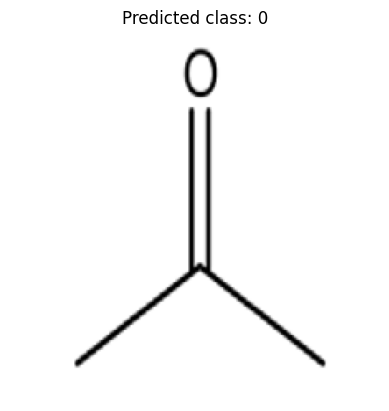

1/1 [==============================] - 0s 54ms/step


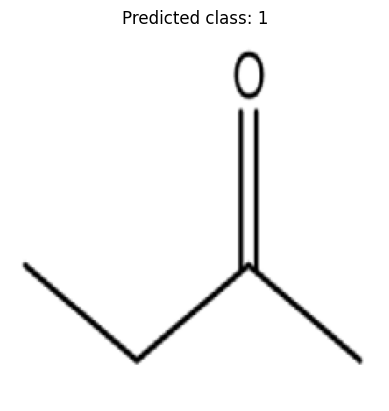

1/1 [==============================] - 0s 61ms/step


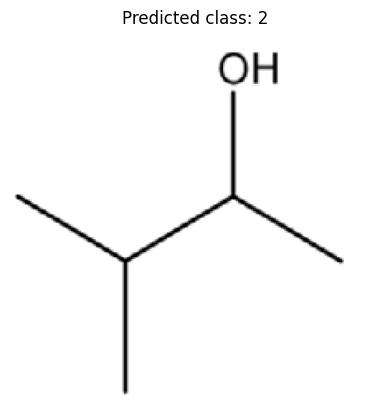

In [68]:
import matplotlib.pyplot as plt
import os

# Set the path to the folder containing the images
image_folder = '/content/new input_Data'  # Replace with the path to your image folder

# Get a list of all image files in the folder
image_files = os.listdir(image_folder)
image_files.sort()  # Sort the files in alphabetical order if needed

# Process each image in the folder
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    # Load and preprocess the image
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image)
    image_array = tf.expand_dims(image_array, axis=0)

    # Make predictions on the image
    predictions = model.predict(image_array)
    predicted_class_index = tf.argmax(predictions, axis=1)[0]

    # Get the predicted class label
    predicted_class_label = predicted_class_index

    # Display the image and the predicted class
    plt.imshow(image)
    plt.title(f"Predicted class: {predicted_class_label}")
    plt.axis('off')
    plt.show()


In [83]:
# Replace with the appropriate code to load your trained object detection model


NameError: ignored